<a href="https://colab.research.google.com/github/shotokillua/cv/blob/main/day-98-Portfolio-Project-Analyze-and-Visualize-the-Space-Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

**df_data has 4324 rows and 9 columns.**

In [ ]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

**The column names are: 'Unamed: 0.1', 'Unamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', and 'Mission_Status'.**

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

**There are NaN values.**

In [ ]:
df_data.duplicated().any()

False

**There are no duplicate values.**

In [ ]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1) # remove the junk columns, axis=1 corresponds to columns, axis=0 corresponds to rows - in this case, we are dropping columns
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True) # UTC argument specifies UTC time zone for datetime object
df_data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [ ]:
df_data['Price'] = df_data['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # remove thousands separator in Price column and convert str to float value

In [ ]:
df_data['Price'].isna().sum()

3360

## Descriptive Statistics

In [ ]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data['Organisation'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


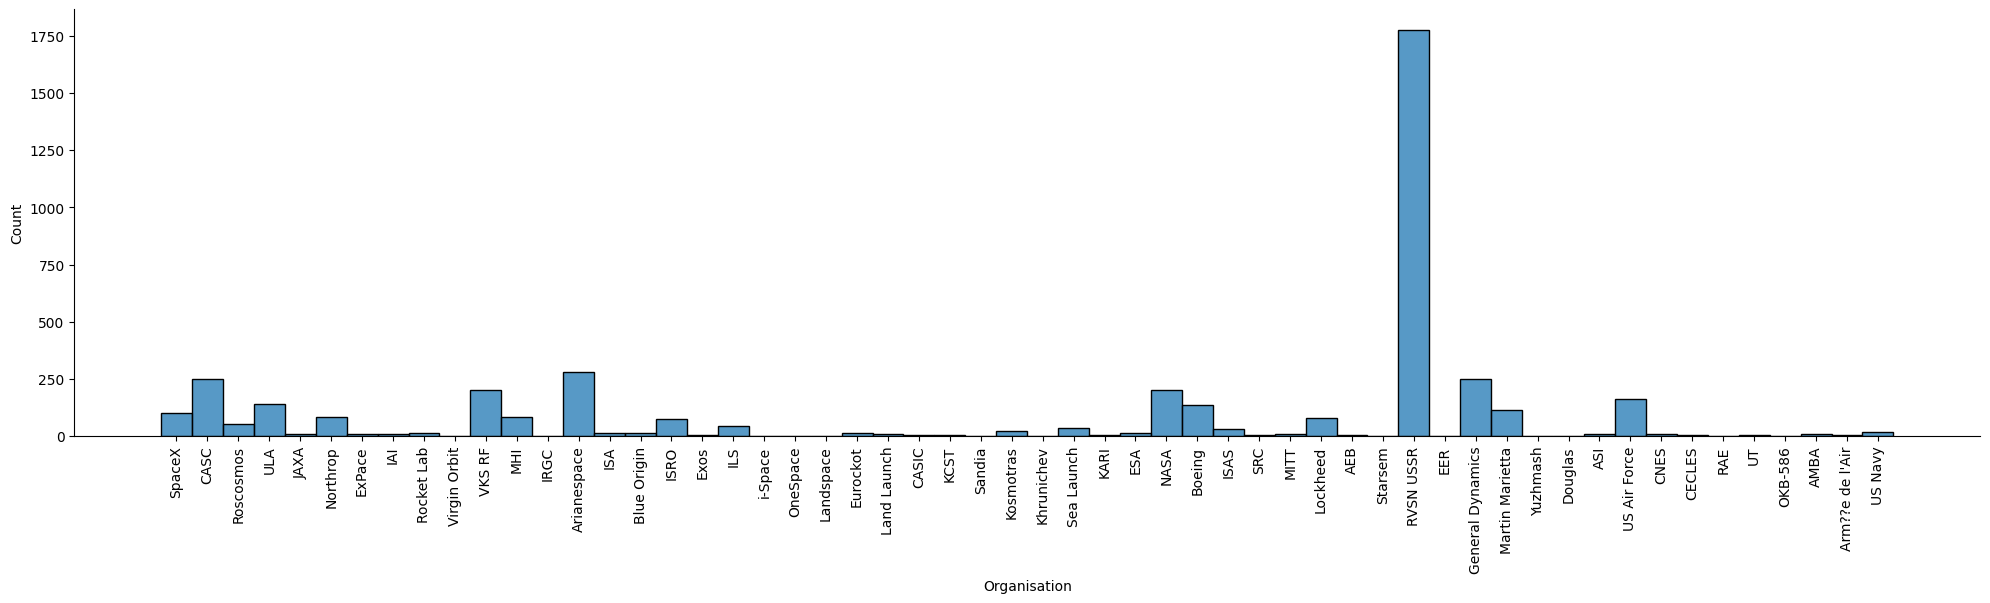

In [ ]:
sns.displot(df_data,
            x=df_data['Organisation'],
            aspect=4)

plt.xticks(rotation=90)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
df_data['Rocket_Status'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

**There are 790 active rockets and 3534 retired rockets.**

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df_data['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

**There were 3879 successful missions, and 445 failures (339 complete failures, 102 partial failures, and 4 pre-launch failure).**

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data.describe() # count shows 964 because 3360 Price values are NaN/missing

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


<Axes: title={'center': 'Distribution of Launch Costs in $MM (USD)'}, ylabel='Frequency'>

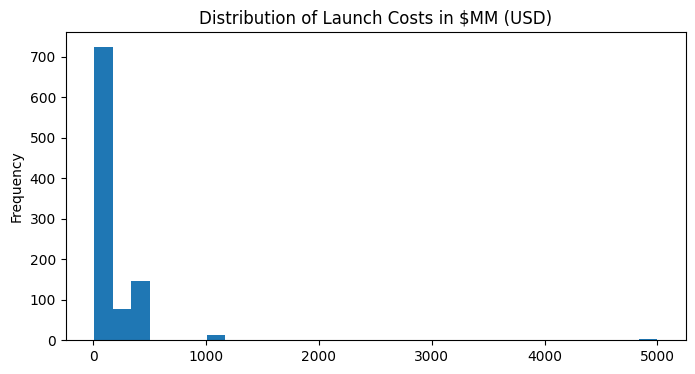

In [ ]:
df_data['Price'].plot(
    figsize=(8,4),
    kind='hist',
    bins=30,
    title='Distribution of Launch Costs in $MM (USD)'
)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data['Location'].sample(20)

1323         LC-7, Taiyuan Satellite Launch Center, China
250               Site 133/3, Plesetsk Cosmodrome, Russia
2582              Site 132/1, Plesetsk Cosmodrome, Russia
1782            SLC-17A, Cape Canaveral AFS, Florida, USA
2427               Site 43/3, Plesetsk Cosmodrome, Russia
2711              LC-13, Cape Canaveral AFS, Florida, USA
1706            SLC-17B, Cape Canaveral AFS, Florida, USA
1996              Site 132/1, Plesetsk Cosmodrome, Russia
2281              SLC-3W, Vandenberg AFB, California, USA
2234               Site 32/2, Plesetsk Cosmodrome, Russia
386           Stargazer, Cape Canaveral AFS, Florida, USA
2734           Site 31/6, Baikonur Cosmodrome, Kazakhstan
1195              Site 133/3, Plesetsk Cosmodrome, Russia
1407            SLC-17A, Cape Canaveral AFS, Florida, USA
986          LC-7, Taiyuan Satellite Launch Center, China
3968            SLC-37B, Cape Canaveral AFS, Florida, USA
1380            SLC-17A, Cape Canaveral AFS, Florida, USA
656           

In [ ]:
df_data['Country'] = df_data['Location'].str.split(',').str[-1].str.strip()
df_data['Country']

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: Country, Length: 4324, dtype: object

In [ ]:
df_data['Country'].replace(
    {'Russia' : 'Russian Federation',
     'New Mexico' : 'USA',
     'Yellow Sea' : 'China',
     'Shahrud Missile Test Site' : 'Iran, Islamic Republic of',
     'Iran' : 'Iran, Islamic Republic of',
     'Pacific Missile Range Facility' : 'USA',
     'Barents Sea' : 'Russian Federation',
     'Gran Canaria' : 'USA',
     'North Korea' : "Korea, Democratic People's Republic of",
     'South Korea' : 'Korea, Republic of',
     'Pacific Ocean' : 'Kiribati'
     },
     inplace=True
)


In [ ]:
df_data['Country'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3) # do this to convert the country name into the ISO value and to make the ISO value the index so that you can reference it from the same df to display the choropleth

In [ ]:
launches_by_country = df_data['Country'].value_counts()
launches_by_country

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [ ]:
world_map = px.choropleth(launches_by_country,
                           locations=launches_by_country.index,
                           color=launches_by_country,
                           title='Number of Launches by Country',
                           color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failures_by_country = df_data[df_data['Mission_Status'] != 'Success']['Country'].value_counts()
failures_by_country

USA    163
KAZ     93
RUS     93
CHN     25
FRA     18
IND     13
JPN     13
IRN      9
KIR      3
PRK      3
BRA      3
AUS      3
NZL      2
KOR      2
ISR      2
Name: Country, dtype: int64

In [ ]:
world_map_failures = px.choropleth(failures_by_country,
                                   locations=failures_by_country.index,
                                   color=failures_by_country,
                                   title='Failures by Country',

                                   color_continuous_scale=px.colors.sequential.matter)
world_map_failures.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [ ]:
burst = px.sunburst(df_data,
                    path=['Country', 'Organisation', 'Mission_Status'],
                    title='Successful & Failed Launches by Country and Organisation'
)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_amt_by_org = df_data.groupby(['Organisation']).agg({'Price':pd.Series.count}) # gives total amount of money spent by organisation

In [ ]:
total_amt_by_org

,Price
Organisation,
AEB,0
AMBA,0
ASI,0
Arianespace,96
Arm??e de l'Air,0
Blue Origin,0
Boeing,7
CASC,158
CASIC,0


In [ ]:
non_zero_totals_by_org = total_amt_by_org[total_amt_by_org != 0] # filter out organisation with NaN or 0 values for Price

In [ ]:
non_zero_totals_by_org

,Price
Organisation,
AEB,NaN
AMBA,NaN
ASI,NaN
Arianespace,96.00
Arm??e de l'Air,NaN
Blue Origin,NaN
Boeing,7.00
CASC,158.00
CASIC,NaN


In [ ]:
bar = px.bar(data_frame=non_zero_totals_by_org,
             x=non_zero_totals_by_org.index,
             y=non_zero_totals_by_org.Price,
             color=non_zero_totals_by_org.index,
             title='Total Amount Spent on Space Missions by Organisation')

bar.update_layout(yaxis_title='Amount Spent in $MM (USD)')

bar.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
avg_price_per_launch_by_org = df_data.groupby(['Organisation']).agg({'Price': 'mean'})
non_zero_avg = avg_price_per_launch_by_org[avg_price_per_launch_by_org != 0]

In [ ]:
non_zero_avg

,Price
Organisation,
AEB,NaN
AMBA,NaN
ASI,NaN
Arianespace,170.26
Arm??e de l'Air,NaN
Blue Origin,NaN
Boeing,177.29
CASC,40.13
CASIC,NaN


In [ ]:
avg_bar = px.bar(data_frame=non_zero_avg,
                 x=non_zero_avg.index,
                 y=non_zero_avg.Price,
                 color=non_zero_avg.index,
                 title='Average Amount Spent per Launch by Organisation')

avg_bar.show()

# Chart the Number of Launches per Year

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [ ]:
df_data['Year'] = df_data['Date'].dt.year
df_data['Year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
4319    1958
4320    1958
4321    1957
4322    1957
4323    1957
Name: Year, Length: 4324, dtype: int64

In [ ]:
launches_per_year = df_data.groupby(['Year'])['Date'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

In [ ]:
launch_bar = px.bar(launches_per_year,
                    x=launches_per_year.index,
                    y=launches_per_year.values,
                    color=launches_per_year.index,
                    title='Launches By Year')

launch_bar.update_layout(yaxis_title='Launches')

launch_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
launches_per_month = df_data.groupby(df_data['Date'].dt.month)['Date'].count()
launches_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Date, dtype: int64

In [ ]:
month_bar = px.bar(launches_per_month,
                   x=launches_per_month.index,
                   y=launches_per_month.values,
                   color=launches_per_month.index,
                   title='Which Month Has the Highest Number of Launches?'
                   )

month_bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

**Looking at the graph, December is the most popular month for launches, while January is the least popular month for launches.**

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957


In [ ]:
avg_price_launch_over_time = df_data.groupby('Year').agg({'Price': pd.Series.mean})
avg_price_launch_over_time.head(50)

,Price
Year,
1957,NaN
1958,NaN
1959,NaN
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,63.23
1965,63.23


In [ ]:
avg_line = px.line(
                   x=avg_price_launch_over_time.index,
                   y=avg_price_launch_over_time.Price,
                   title='Average Launch Price Over Time')

avg_line.update_layout(xaxis_title='Year',
                       yaxis_title='Price of Average Launch in $MM (USD)'
)

avg_line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
top_10_org = df_data['Organisation'].value_counts()
top_10_org = top_10_org.index[:10]
top_10_org


Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

In [ ]:
top_10_org_launches = df_data[df_data['Organisation'].isin(top_10_org)].groupby(['Organisation', 'Year'])['Date'].count().unstack(level=0)
top_10_org_launches

Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,2.00,5.00,NaN,2.00,NaN
1959,NaN,NaN,NaN,1.00,NaN,1.00,4.00,NaN,10.00,NaN
1960,NaN,NaN,NaN,5.00,NaN,4.00,9.00,NaN,21.00,NaN
1961,NaN,NaN,NaN,8.00,NaN,12.00,9.00,NaN,23.00,NaN
...,...,...,...,...,...,...,...,...,...,...
2016,11.00,NaN,22.00,NaN,NaN,NaN,NaN,12.00,NaN,4.00
2017,11.00,NaN,16.00,NaN,NaN,NaN,NaN,8.00,NaN,6.00
2018,11.00,NaN,37.00,NaN,NaN,NaN,NaN,8.00,NaN,5.00


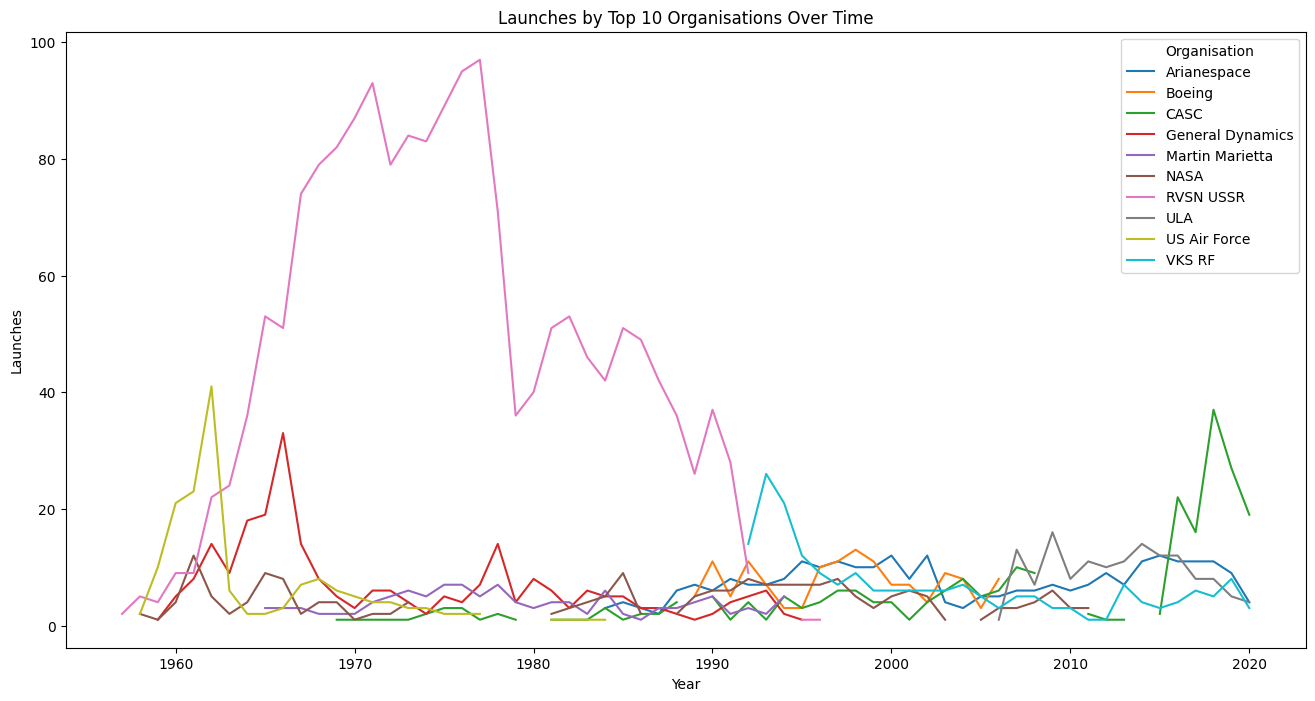

In [ ]:
top_10_org_launches.plot(figsize=(16,8),
                         title='Launches by Top 10 Organisations Over Time')

plt.ylabel('Launches')

plt.show()

**US Air Force dominated in the early 1960s
RVSN USSR dominated from mid 1960s thru mid 1990s
VKS RF dominated from mid 1990s but by late 1990s the space race tightened with several other organisations catching up.
It was not until mid 2010s in which CASC became dominant and has been so ever since.**

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
cold_war_df = df_data[df_data['Year'] <= 1991]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
cold_war_df['Country'] = cold_war_df['Country'].replace({'KAZ':'RUS'})

<ipython-input-59-5e9606a54cd5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cold_war_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1717,CASC,"LC-3, Xichang Satellite Launch Center, China",1991-12-28 12:00:00+00:00,Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,CHN,1991
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,RUS,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1991-12-16 22:19:00+00:00,"Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,FRA,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957


In [ ]:
usa_vs_ussr_df = cold_war_df[cold_war_df['Country'].isin(['USA', 'RUS'])]
usa_vs_ussr_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,RUS,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,RUS,1991
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957


In [ ]:
total_launches_space_race = usa_vs_ussr_df.groupby(['Country']).count()
total_launches_space_race

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
Country,,,,,,,,
RUS,1770,1770,1770,1770,1770,2,1770,1770
USA,662,662,662,662,662,90,662,662


In [ ]:
pie = px.pie(total_launches_space_race,
              names=total_launches_space_race.index,
              values='Detail',
              title='Cold War Space Launches Between the USA and USSR')

pie.show()

**The USSR launched almost 3x more than the USA in the space race.**

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
usa_vs_ussr_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",1991-12-20 00:00:00+00:00,Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,RUS,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-12-18 03:54:00+00:00,Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1991-12-07 22:47:00+00:00,Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-11-28 13:23:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,1991
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-11-27 03:30:00+00:00,Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,RUS,1991
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957


In [ ]:
cold_war_launch_per_year = usa_vs_ussr_df.groupby(['Country', 'Year'])['Mission_Status'].count().unstack(level=0)
cold_war_launch_per_year

Country,RUS,USA
Year,,
1957,2,1
1958,5,23
1959,4,16
1960,9,30
1961,9,43
1962,22,60
1963,24,17
1964,36,24
1965,53,33


Text(0, 0.5, 'Launches')

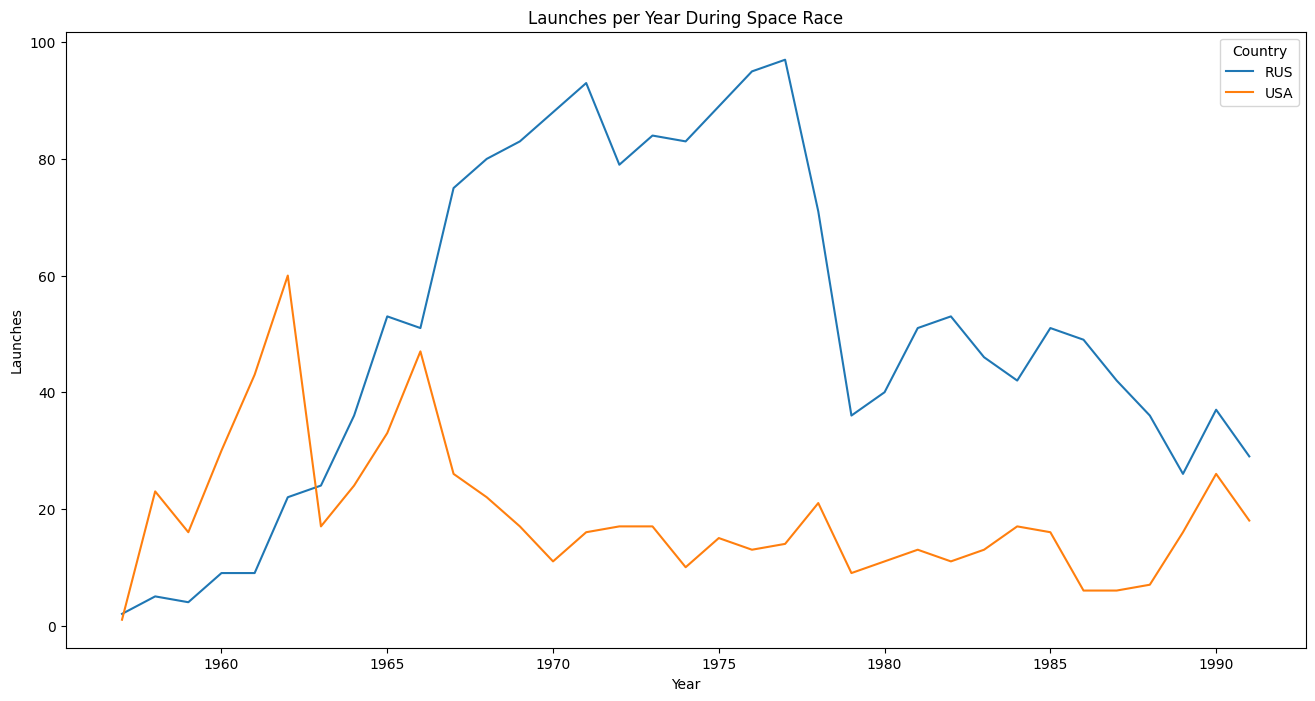

In [ ]:
cold_war_launch_per_year.plot(figsize=(16,8),
                              title='Launches per Year During Space Race')
plt.ylabel('Launches')

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
failed_launches_per_year = usa_vs_ussr_df[usa_vs_ussr_df['Mission_Status'] != 'Success']

In [ ]:
failed_launches_per_year = failed_launches_per_year.groupby(['Country','Year'])['Mission_Status'].count().unstack(level=0)


<Axes: title={'center': 'Failed Launches by Year During Space Race'}, xlabel='Year'>

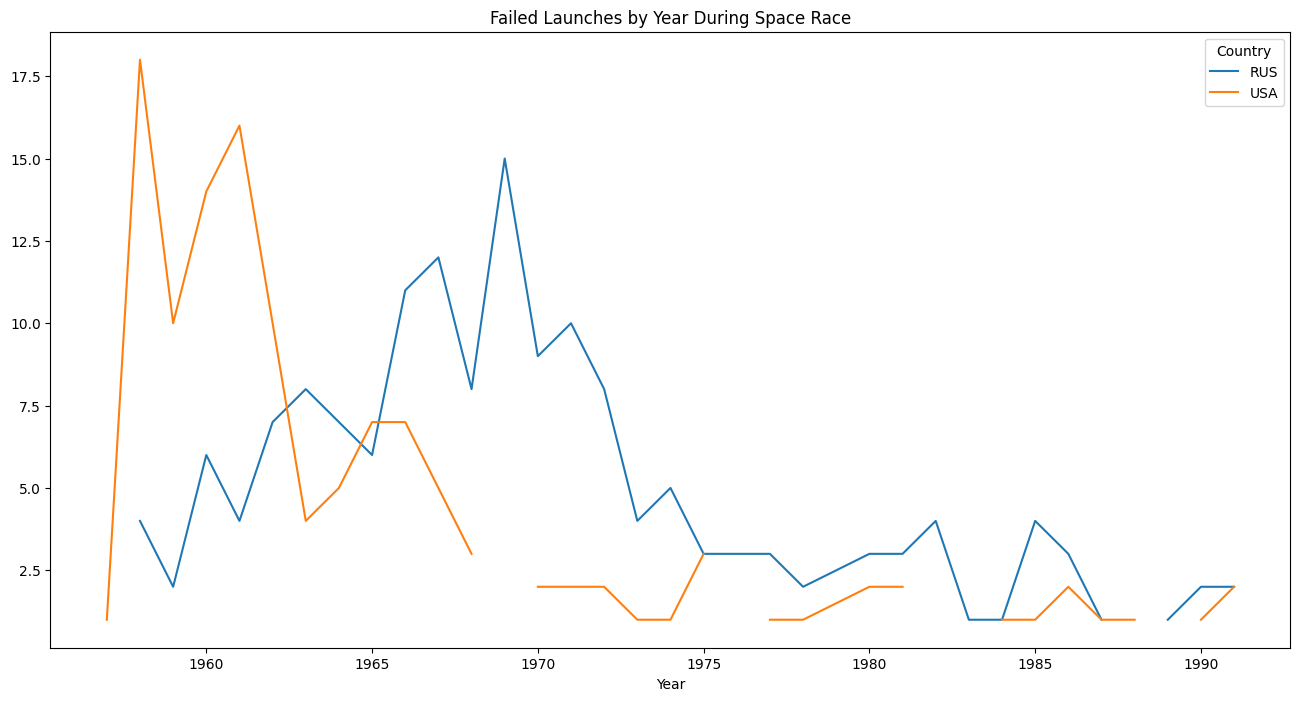

In [ ]:
failed_launches_per_year.plot(figsize=(16,8),
                              title='Failed Launches by Year During Space Race')

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:
percentage_failure = failed_launches_per_year / cold_war_launch_per_year * 100
percentage_failure

Country,RUS,USA
Year,,
1957,NaN,100.00
1958,80.00,78.26
1959,50.00,62.50
1960,66.67,46.67
1961,44.44,37.21
1962,31.82,16.67
1963,33.33,23.53
1964,19.44,20.83
1965,11.32,21.21


Text(0, 0.5, 'Percentage of Failure (%)')

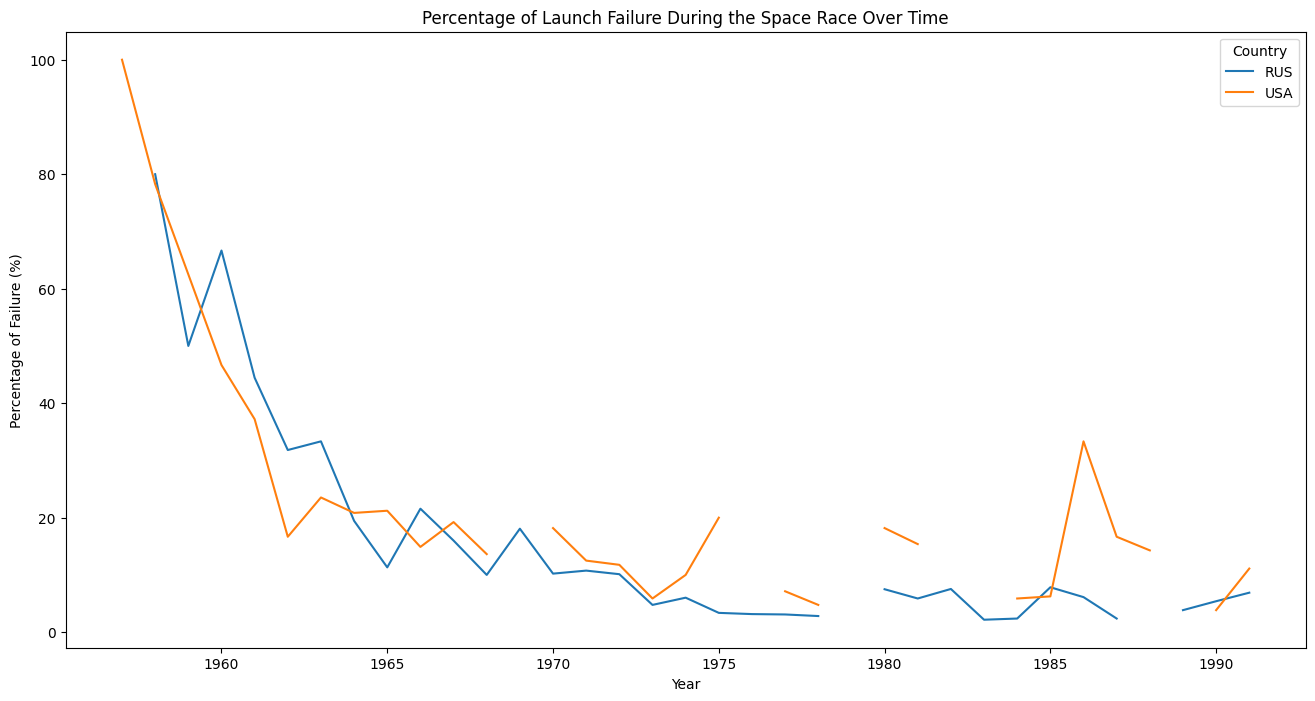

In [ ]:
percentage_failure.plot(figsize=(16,8),
                        title='Percentage of Launch Failure During the Space Race Over Time')
plt.ylabel('Percentage of Failure (%)')

**Failures went down over time for both countries indicating that they likely got better at minimising risk and improving their chances of success over time.**

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957


In [ ]:
total_num_launches = df_data.groupby(['Country','Year'])['Mission_Status'].count().unstack(level=0)
total_num_launches

Country,AUS,BRA,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
Year,,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,23.00
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,16.00
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN,NaN,NaN,NaN,30.00
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,2.00,43.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,22.00,11.00,7.00,NaN,1.00,4.00,11.00,NaN,NaN,NaN,NaN,1.00,6.00,27.00
2017,NaN,NaN,18.00,11.00,5.00,1.00,NaN,7.00,13.00,NaN,NaN,NaN,1.00,NaN,6.00,30.00
2018,NaN,NaN,39.00,11.00,7.00,NaN,NaN,6.00,9.00,NaN,NaN,NaN,3.00,NaN,8.00,34.00


Text(0, 0.5, 'Number of Launches')

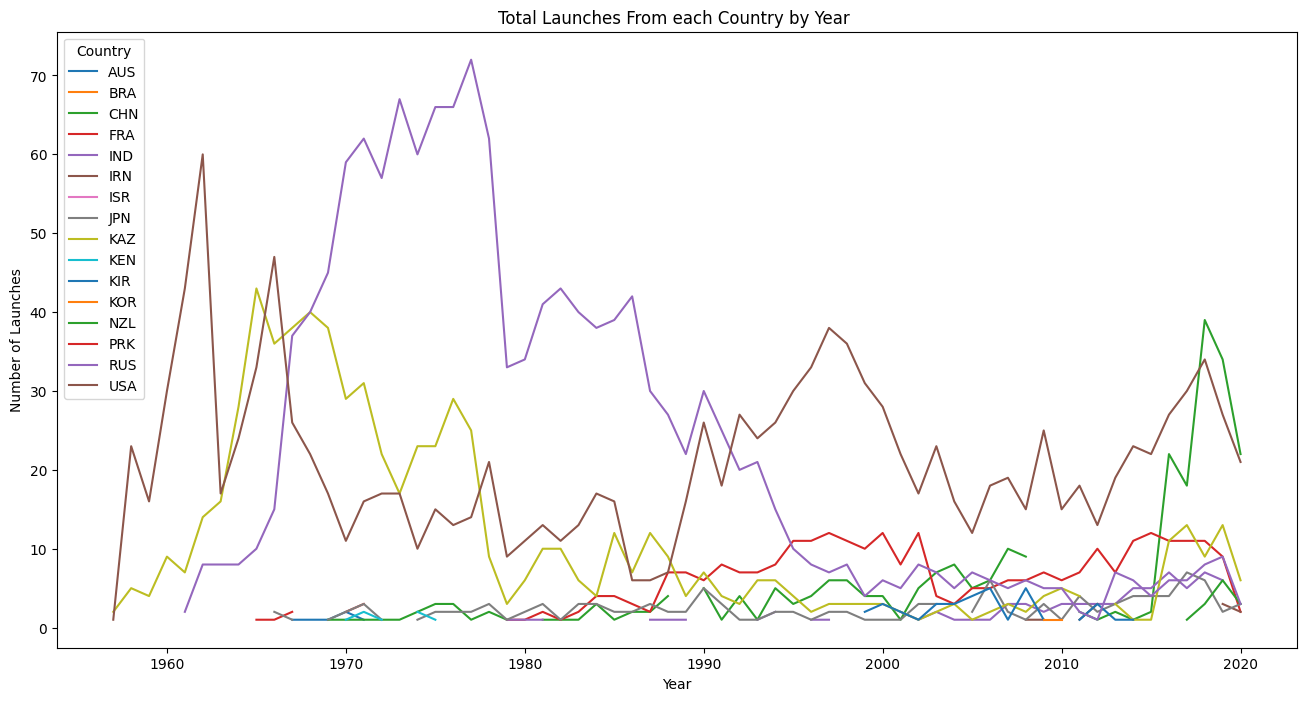

In [ ]:
total_num_launches.plot(figsize=(16,8),
                       title='Total Launches From each Country by Year ')
plt.ylabel('Number of Launches')

In [ ]:
total_successful_launches = df_data[df_data['Mission_Status'] == 'Success']
total_successful_launches = total_successful_launches.groupby(['Country', 'Year'])['Mission_Status'].count().unstack(level=0)
total_successful_launches

Country,AUS,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
Year,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,6.00
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,16.00
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN,27.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,20.00,11.00,7.00,NaN,1.00,4.00,10.00,NaN,NaN,NaN,NaN,1.00,6.00,26.00
2017,NaN,16.00,11.00,4.00,NaN,NaN,6.00,12.00,NaN,NaN,NaN,NaN,NaN,5.00,30.00
2018,NaN,38.00,10.00,7.00,NaN,NaN,6.00,8.00,NaN,NaN,NaN,3.00,NaN,8.00,33.00


<Axes: title={'center': 'Total Successful Launches From Each Country by Year'}, xlabel='Year'>

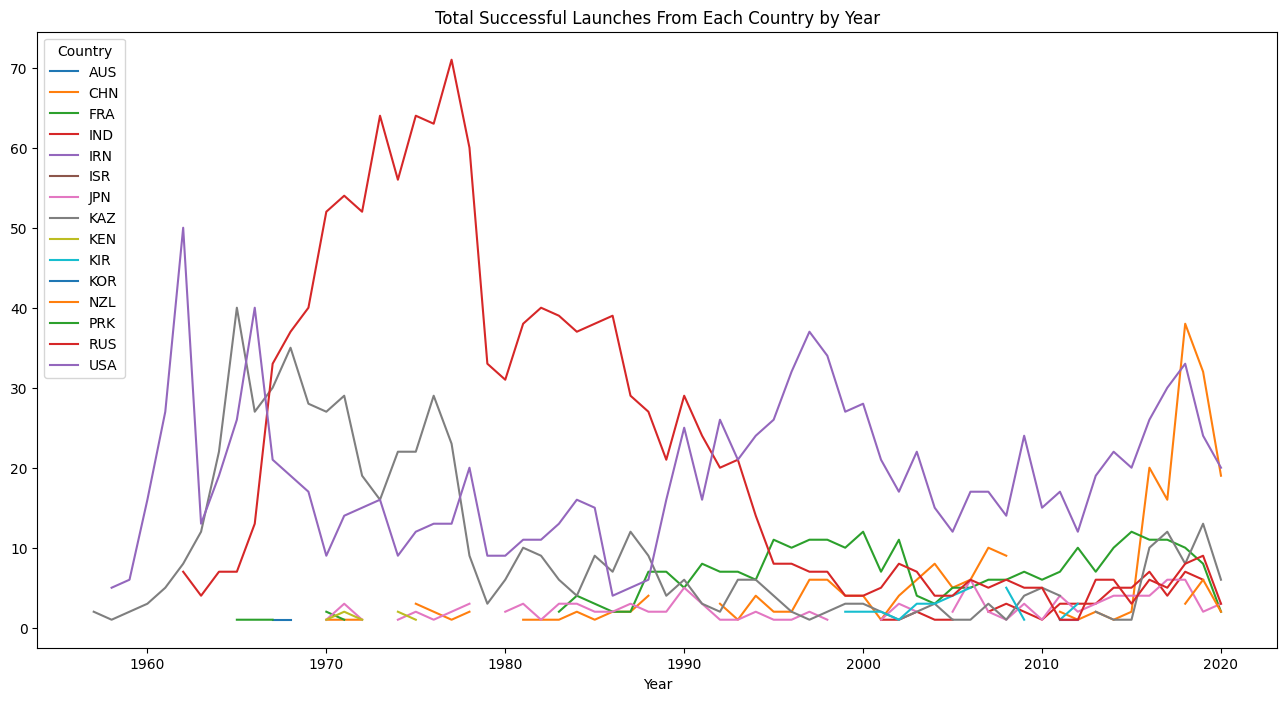

In [ ]:
total_successful_launches.plot(figsize=(16,8),
                               title='Total Successful Launches From Each Country by Year')

**Generally speaking, the charts seem to indicate that the leading countries do not change if we only look at the number of successful launches. The US, Russia, and China appear to be dominating in both trends at vairous points in time.**

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957


In [ ]:
org_most_launches = df_data.groupby(['Organisation', 'Year'])['Mission_Status'].count().unstack(level=0)

In [ ]:
org_most_launches

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
Year,,,,,,,,,,,,,,,,,,,,,
1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
1958,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.00,12.00,NaN,NaN,NaN,NaN,NaN
1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.00,4.00,NaN,NaN,NaN,NaN,NaN
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,NaN,NaN,11.00,NaN,4.00,NaN,22.00,NaN,NaN,...,9.00,NaN,12.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN
2017,NaN,NaN,NaN,11.00,NaN,1.00,NaN,16.00,1.00,NaN,...,18.00,NaN,8.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN
2018,NaN,NaN,NaN,11.00,NaN,2.00,NaN,37.00,NaN,NaN,...,21.00,NaN,8.00,NaN,NaN,NaN,5.00,NaN,NaN,NaN


(0.0, 105.0)

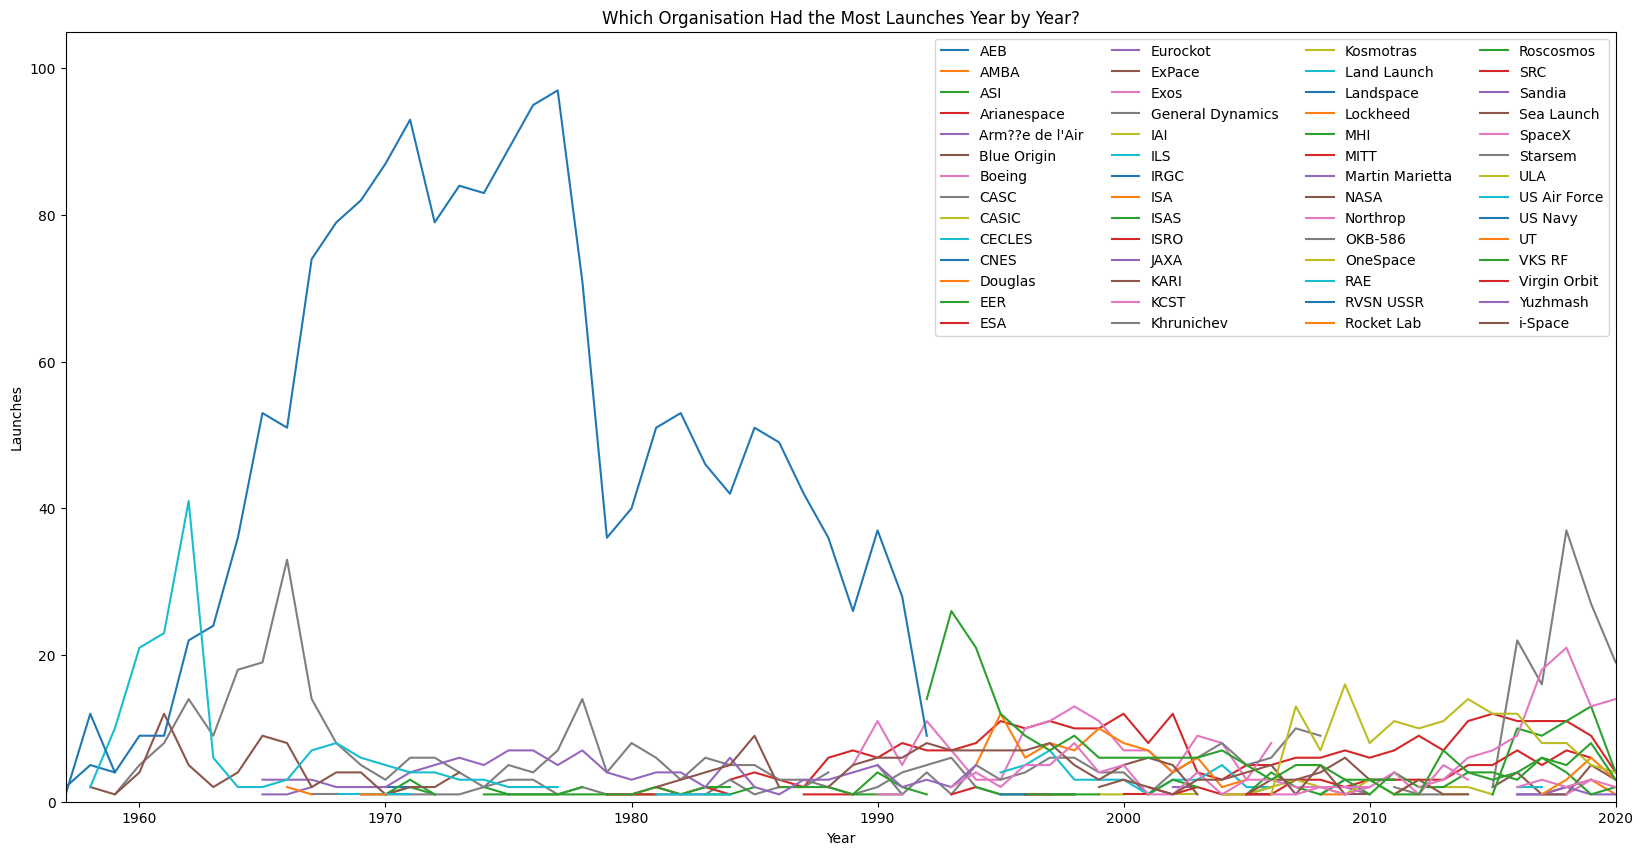

In [ ]:
org_most_launches.plot(figsize=(20,10),
                       title='Which Organisation Had the Most Launches Year by Year?')

plt.ylabel('Launches')
plt.legend(loc='upper right', ncol=4)
plt.xlim(1957, 2020)
plt.ylim(0, 105)

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

**The 70s and 80s were dominated by RNSN USSR. The CASC was the dominant organisation in 2018, 2019, and 2020, though to a much lesser extend that the USSR was in the 70s and 80s.**